### Activity 4
### 63010026 กฤตศยา นทีมณฑล
### 63010339 ณัฐวดี ติณภูมิ

In [1470]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats import mode,zscore

### Data Exploring

In [1471]:
df = pd.read_csv("CarPrice.csv")

In [1472]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [1473]:
df.sample

<bound method NDFrame.sample of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [1474]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Cleaning

In [1475]:
df.drop(columns=['car_ID','CarName'],inplace=True)

In [1476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [1477]:
df.fillna(0)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Data Transform & Selection

In [1478]:
df_standard = df.copy()
df_standard = df_standard.select_dtypes(exclude=object)
df_standard.drop(columns=['price'],inplace=True)
df_standard

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [1479]:
df_real_standard = zscore(df_standard)
df_real_standard 

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490
201,-1.476452,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195
202,-1.476452,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332
203,-1.476452,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059


<AxesSubplot:>

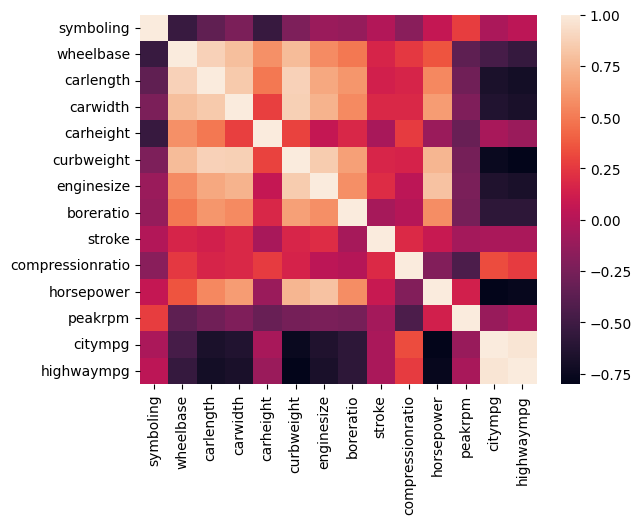

In [1480]:
df_corr = df_real_standard.corr()
sns.heatmap(df_corr)

In [1481]:
lower = pd.DataFrame(np.tril(df_corr, -1),columns = df_corr.columns)
print(lower)

    symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0    0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
1   -0.531954   0.000000   0.000000  0.000000   0.000000    0.000000   
2   -0.357612   0.874587   0.000000  0.000000   0.000000    0.000000   
3   -0.232919   0.795144   0.841118  0.000000   0.000000    0.000000   
4   -0.541038   0.589435   0.491029  0.279210   0.000000    0.000000   
5   -0.227691   0.776386   0.877728  0.867032   0.295572    0.000000   
6   -0.105790   0.569329   0.683360  0.735433   0.067149    0.850594   
7   -0.130051   0.488750   0.606454  0.559150   0.171071    0.648480   
8   -0.008735   0.160959   0.129533  0.182942  -0.055307    0.168790   
9   -0.178515   0.249786   0.158414  0.181129   0.261214    0.151362   
10   0.070873   0.353294   0.552623  0.640732  -0.108802    0.750739   
11   0.273606  -0.360469  -0.287242 -0.220012  -0.320411   -0.266243   
12  -0.035823  -0.470414  -0.670909 -0.642704  -0.048640   -0.75

In [1482]:
df_real_standard

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490
201,-1.476452,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195
202,-1.476452,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332
203,-1.476452,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059


In [1483]:
#remove ถ้า >0.86
to_drop = [column for column in lower if any(lower[column] > 0.86)]
df_real_standard.drop(to_drop, inplace=True, axis=1)

In [1484]:
df_real_standard

,symboling,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg
0,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059
1,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059
2,0.133509,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.691627
3,0.938490,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.109354
4,0.938490,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.273900
...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.400490
201,-1.476452,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.837195
202,-1.476452,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.128332
203,-1.476452,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,-0.546059


In [1485]:
df_category=df.select_dtypes(include=object)
df_category

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [1486]:
df_onehot=pd.get_dummies(df_category,columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],dtype=int,drop_first=True)
df_onehot
#y=pd.get_dummies(df_category.Z,dtype=float)

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
201,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
202,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
203,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### PCA

In [1487]:
pca = PCA()
x_pca = pca.fit_transform(df_real_standard)

<BarContainer object of 10 artists>

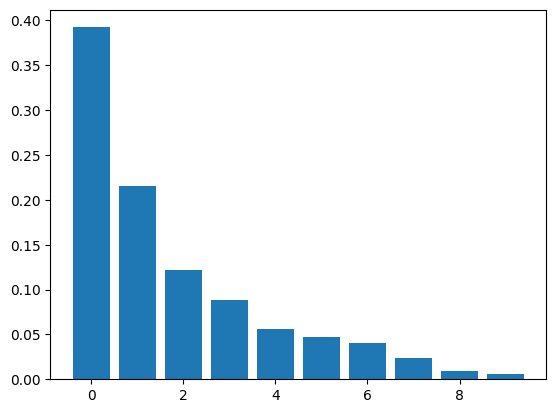

In [1488]:
z = range(len(df_real_standard.columns))
plt.bar(z,pca.explained_variance_ratio_)
#plt.show()

In [1489]:
pca2 = PCA(n_components=3)
X_pca_2 = pca2.fit_transform(df_real_standard)
print(X_pca_2)

[[ 0.04804799 -2.00138869  0.15857615]
 [ 0.04804799 -2.00138869  0.15857615]
 [ 0.43935091 -0.80626481 -1.0622759 ]
 [-0.69421143 -0.71854647 -0.36831441]
 [ 0.69901689 -1.19465356 -0.17551759]
 [ 0.10833221 -1.30917081 -0.43160273]
 [ 0.61475397 -0.38554777  0.19916272]
 [ 0.71638496 -0.3667428   0.18815571]
 [ 1.34838088 -0.67565632  0.2870237 ]
 [ 1.31283218 -1.32907152  0.04309271]
 [-0.35994863 -1.26114873  1.37740488]
 [-0.20444355 -0.54992588  1.91964208]
 [ 1.15970173  0.95791651  0.13738544]
 [ 1.21051723  0.96731899  0.13188194]
 [ 1.65266383  0.85468117  0.10407154]
 [ 3.4642839  -0.48735719  0.37961656]
 [ 3.51263407 -0.85432947  0.06201601]
 [ 3.87129704 -0.37684942  0.48321833]
 [-4.48486009  0.17523361 -0.06344153]
 [-2.79604184 -0.33746831  0.02374415]
 [-2.68595217  0.02412651  0.29136051]
 [-2.82632584 -0.71941408 -0.3613495 ]
 [-2.63752298 -0.80203611 -0.29982356]
 [-1.31879351 -1.38716713 -0.37596611]
 [-2.56247019 -0.82574082 -0.33918846]
 [-2.54214399 -0.82197982

In [1490]:
print('Explained Variance ratio = ', pca2.explained_variance_ratio_)
print('Explained Variance (eigenvalues) = ', pca2.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) ')
print(pca2.components_[0:3,:])

Explained Variance ratio =  [0.39241832 0.21550574 0.12151467]
Explained Variance (eigenvalues) =  [3.9434194  2.16562138 1.22110335]
--------------------------------------------
PCA components (eigenvectors) 
[[-0.09658932  0.10997949  0.47989111  0.45654965  0.38781055  0.07103209
  -0.00248127  0.43037647 -0.11076157 -0.4323207 ]
 [-0.4417639   0.47851081  0.08879511 -0.02327714  0.03434895  0.06572215
   0.47077121 -0.27143802 -0.48152872  0.18647352]
 [-0.33680135  0.36879109 -0.05197394 -0.16872805  0.13572012 -0.7016823
  -0.40137537 -0.03874556  0.16372314 -0.13856715]]


### Linear Regression

In [1491]:
X = pd.concat([df_real_standard,df_onehot],axis=1)
X

,symboling,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,...,0,0,0,0,0,0,0,1,0,0
1,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,...,0,0,0,0,0,0,0,1,0,0
2,0.133509,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.691627,...,0,0,0,0,0,0,0,1,0,0
3,0.938490,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.109354,...,0,0,0,0,0,0,0,1,0,0
4,0.938490,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.273900,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.400490,...,0,0,0,0,0,0,0,1,0,0
201,-1.476452,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.837195,...,0,0,0,0,0,0,0,1,0,0
202,-1.476452,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.128332,...,0,0,0,0,0,0,0,1,0,0
203,-1.476452,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,-0.546059,...,0,0,0,0,0,1,0,0,0,0


In [1492]:
X.columns

Index(['symboling', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'highwaympg',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [1493]:
Y=df['price']
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [1494]:
#No PCA
pca0 = PCA(n_components=0)
X_pca_0 = pca0.fit_transform(X)
print(X_pca_0)

[]


In [1495]:
#PCA 5
pca5 = PCA(n_components=5)
X_pca_5 = pca5.fit_transform(X)
print(X_pca_5)

[[ 0.41616885 -2.1517262   0.14035548  2.55591416  0.15525833]
 [ 0.41616885 -2.1517262   0.14035548  2.55591416  0.15525833]
 [ 0.92132115 -1.23063503 -1.07798624 -0.75030323  0.31087063]
 ...
 [ 2.64425906  0.09175905  1.93007    -0.29393937  0.80205484]
 [ 1.25047129  3.11882649 -1.59296171 -0.30189139  2.09010127]
 [ 2.08074373  0.74192282  1.37437356 -0.54059743  0.3027289 ]]


In [1496]:
#PCA 10
pca10 = PCA(n_components=10)
X_pca_10 = pca10.fit_transform(X)
print(X_pca_10)

[[ 0.41616885 -2.1517262   0.14035548 ... -0.04758508 -0.90509698
  -0.45973432]
 [ 0.41616885 -2.1517262   0.14035548 ... -0.04758508 -0.90509698
  -0.45973432]
 [ 0.92132115 -1.23063503 -1.07798624 ...  1.23321314 -0.1988496
  -0.66742035]
 ...
 [ 2.64425906  0.09175905  1.93007    ...  0.06560306  0.1605314
  -0.3053796 ]
 [ 1.25047129  3.11882649 -1.59296171 ...  1.00857808 -0.64444966
   0.13125487]
 [ 2.08074373  0.74192282  1.37437356 ...  0.12197019 -0.18934683
  -0.07767748]]


In [1497]:
#Shuffle Split (Train / Test Split)
Rseed = 42
x_train_set, x_test, y_train_set, y_test = train_test_split(X, Y, test_size = 0.3, random_state = Rseed)
# Shuffle Split (Train / Validation Split)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
# Perform Linear Regression -> All variables
lr = LinearRegression()
#Train
lr.fit(x_train, y_train)
#Validate
y_pred_lr = lr.predict(x_validate)
# Test
y_test_pred_lr = lr.predict(x_test)

In [1498]:
# Measure Accuracy Validation and Test
r2_score(y_pred_lr, y_validate)

0.6762926688966157

In [1499]:
r2_score(y_test_pred_lr, y_test)

0.8114274547530808

In [1500]:
lr.score(x_validate, y_validate)

0.7923861945520518

In [1501]:
lr.score(x_test, y_test)

0.8443654641779235

In [1502]:
#PCA 0
x_train_set, x_test, y_train_set, y_test = train_test_split(X, Y, test_size = 0.3, random_state = Rseed )
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
# Perform Linear Regression -> All variables
lr = LinearRegression()
# train
lr.fit(x_train, y_train)
# validate
y_pred_lr = lr.predict(x_validate)
# test
y_test_pred_lr = lr.predict(x_test)
# Measure Accuracy Validation and Test
r2valid_0= r2_score(y_pred_lr, y_validate)
r2test_0= r2_score(y_test_pred_lr, y_test)

In [1503]:
#PCA 5
x_train_set, x_test, y_train_set, y_test = train_test_split(X_pca_5, Y, test_size = 0.3, random_state = Rseed )
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
# Perform Linear Regression -> All variables
lr = LinearRegression()
# train
lr.fit(x_train, y_train)
# validate
y_pred_lr = lr.predict(x_validate)
# test
y_test_pred_lr = lr.predict(x_test)
# Measure Accuracy Validation and Test
r2valid_5 = r2_score(y_pred_lr, y_validate)
r2test_5 = r2_score(y_test_pred_lr, y_test)

In [1504]:
#PCA 10
x_train_set, x_test, y_train_set, y_test = train_test_split(X_pca_10, Y, test_size = 0.3, random_state = Rseed )
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
# Perform Linear Regression -> All variables
lr = LinearRegression()
# train
lr.fit(x_train, y_train)
# validate
y_pred_lr = lr.predict(x_validate)
# test
y_test_pred_lr = lr.predict(x_test)
# Measure Accuracy Validation and Test
r2valid_10= r2_score(y_pred_lr, y_validate)
r2test_10= r2_score(y_test_pred_lr, y_test)

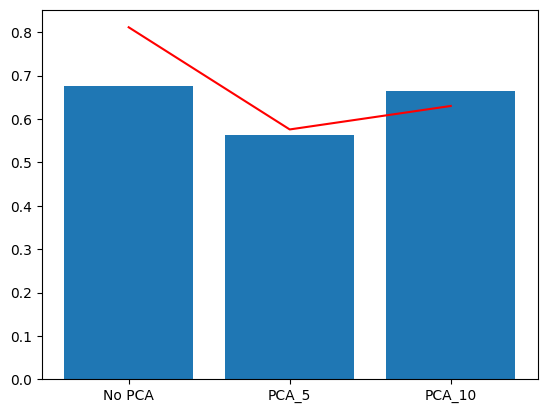

In [1505]:
plt.bar(["No PCA","PCA_5","PCA_10"],[r2valid_0,r2valid_5,r2valid_10])
plt.plot([r2test_0,r2test_5,r2test_10],color='r')
plt.show()

In [1506]:
#MSE 0
x_train_set, x_test, y_train_set, y_test = train_test_split(X, Y, test_size = 0.3, random_state = Rseed )
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
# Perform Linear Regression -> All variables
lr = LinearRegression()
# train
lr.fit(x_train, y_train)
# validate
y_pred_lr = lr.predict(x_validate)
# test
y_test_pred_lr = lr.predict(x_test)
# Measure Accuracy Validation and Test
msevalid_0= mean_squared_error(y_pred_lr, y_validate)
msetest_0= mean_squared_error(y_test_pred_lr, y_test)

In [1507]:
#MSE 5
x_train_set, x_test, y_train_set, y_test = train_test_split(X_pca_5, Y, test_size = 0.3, random_state = Rseed )
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
# Perform Linear Regression -> All variables
lr = LinearRegression()
# train
lr.fit(x_train, y_train)
# validate
y_pred_lr = lr.predict(x_validate)
# test
y_test_pred_lr = lr.predict(x_test)
# Measure Accuracy Validation and Test
msevalid_5= mean_squared_error(y_pred_lr, y_validate)
msetest_5= mean_squared_error(y_test_pred_lr, y_test)

In [1508]:
#MSE 10
x_train_set, x_test, y_train_set, y_test = train_test_split(X_pca_10, Y, test_size = 0.3, random_state = Rseed )
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
# Perform Linear Regression -> All variables
lr = LinearRegression()
# train
lr.fit(x_train, y_train)
# validate
y_pred_lr = lr.predict(x_validate)
# test
y_test_pred_lr = lr.predict(x_test)
# Measure Accuracy Validation and Test
msevalid_10= mean_squared_error(y_pred_lr, y_validate)
msetest_10= mean_squared_error(y_test_pred_lr, y_test)

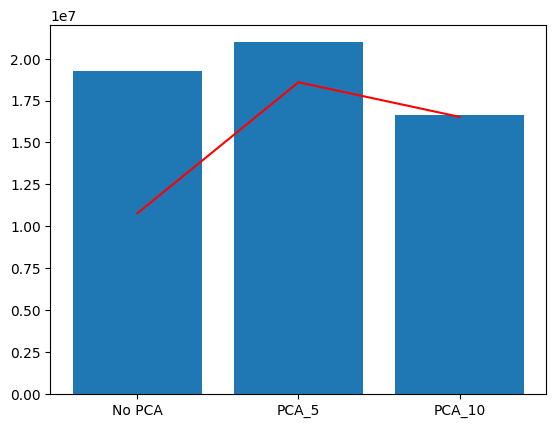

In [1509]:
plt.bar(["No PCA","PCA_5","PCA_10"],[msevalid_0,msevalid_5,msevalid_10])
plt.plot([msetest_0,msetest_5,msetest_10],color='r')
plt.show()